#**Simple Reflex Agent**

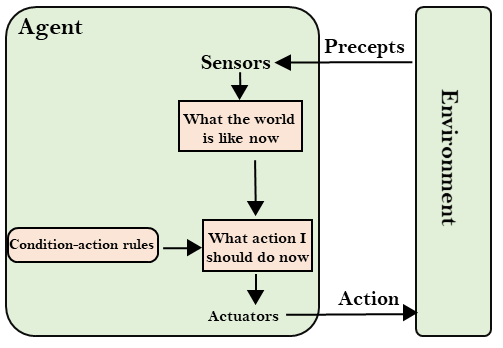

In [ ]:
#we need 2 classes Environment and Agent and 1 Simulation Function

class Environment:
  pass


class Agent:
  pass


def agent_simulation(agent, environment):
  pass




In [ ]:
class Environment:
    def __init__(self, initial_state):
        self.initial_state = initial_state #Initial state could be fixed or random

    def get_percept(self):
      #initial condition of environment , that would be perceived by agent
      pass

    def effect_on_environment(self):
        self.state = 'Taskdone'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        #Determine action based on the initial percept
        pass


def run_agent(agent, environment):
    # The agent reacts to the initial stimulus/Percept
    percept = environment.get_percept()
    action = agent.act(percept)
    print(f"Percept: {percept}, Action: {action}")


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment(initial_state=0)  # Start with any initial condition (high/low , 1/0, True/False , high/med/low etc based on scenario)

# Run the agent in the environment (only once)
run_agent(agent, environment)


#**Simple Reflex-Based Hand-Pulling Agent: Code1**

Imagine a robot or an automated hand safety system designed to detect the heat level of objects and prevent harm by retracting upon touching dangerously hot surfaces. This system uses a reflex agent to make immediate decisions based on perceptual input from the environment.

In [ ]:
class Environment:
    def __init__(self, heat_level='High'):
        self.heat_level = heat_level

    def get_percept(self):
        """Return the heat level of the object as the percept."""
        return 'Hot' if self.heat_level == 'High' else 'Cool'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        """Determine action based on the percept (heat level)."""
        if percept == 'Hot':
            return 'Pull hand away, you touched the hot object'
        else:
            return 'You have not touched any hot object , No need to pull away'


def run_agent(agent, environment):
    # The agent reacts to the heat stimulus only once
    percept = environment.get_percept()
    action = agent.act(percept)
    print(f"Percept: {percept}, Action: {action}")


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()  # Start with a hot object

# Run the agent in the environment (only once)
run_agent(agent, environment)


Percept: Hot, Action: Pull hand away, you touched the hot object


#Example # 2 (Vaccumm Cleaner)

In [ ]:


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


class SimpleReflexAgent:
    def __init__(self):
        pass

    def act(self, percept):
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - Dirty, Action - Clean the room
Step 2: Percept - Clean, Action - Room is clean
Step 3: Percept - Clean, Action - Room is clean
Step 4: Percept - Clean, Action - Room is clean
Step 5: Percept - Clean, Action - Room is clean


In [ ]:
#another method using Inheritance (another logic)

class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'

    def run_agent(self, agent, steps):
        """Simulates the environment interacting with the agent."""
        for step in range(steps):
            percept = self.get_percept()
            action = agent.act(percept)
            print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
            if percept == 'Dirty':
                self.clean_room()

class Agent(Environment):  # Inheriting from Environment
    def __init__(self, state='Dirty'):
        super().__init__(state)  # Initialize environment state

    def act(self, percept):
        """Define the agent's action based on percept."""
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'

# Create an agent instance (inherits from Environment)
agent = Agent()

# Run the agent in the environment for 5 steps
agent.run_agent(agent, 5)


Step 1: Percept - Dirty, Action - Clean the room
Step 2: Percept - Clean, Action - Room is clean
Step 3: Percept - Clean, Action - Room is clean
Step 4: Percept - Clean, Action - Room is clean
Step 5: Percept - Clean, Action - Room is clean


#Example 3 Simple Reflex Agent Code Example #3 (2D Grid-Based Vacuum Cleaner Simulation: Smart Cleaning Robot (Reflex Baed))

In [ ]:
class SimpleReflexAgent:
    def __init__(self):
        self.position = 0  # Start at position 0 (top-left corner)

    def act(self, percept):
        # If the current position is dirty, clean it
        if percept == 'Dirty':
            return 'Clean the room'
        else:
            return 'Move to the next room'

    def move(self):
        # Move to the next position in the grid
        if self.position < 8:  # Stay within bounds of the grid
            self.position += 1
        return self.position


class Environment:
    def __init__(self):
        # Create the environment with a 3x3 grid, where 'Dirty' and 'Clean' states are defined
        self.grid = ['Clean', 'Dirty', 'Clean',
                     'Clean', 'Dirty', 'Dirty',
                     'Clean', 'Clean', 'Clean']

    def get_percept(self, position):
        # Return the state of the current position
        return self.grid[position]

    def clean_room(self, position):
        # Clean the room at the given position
        self.grid[position] = 'Clean'

    def display_grid(self, agent_position):
        # Display the current state of the grid in a 3x3 format
        print("\nCurrent Grid State:")
        grid_with_agent = self.grid[:]  # Copy the grid
        grid_with_agent[agent_position] = "👽"  # Place the agent at the current position
        for i in range(0, 9, 3):
            print(" | ".join(grid_with_agent[i:i + 3]))
        print()  # Extra line for spacing


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept(agent.position)
        action = agent.act(percept)
        print(f"Step {step + 1}: Position {agent.position} -> Percept - {percept}, Action - {action}")

        # If the room is dirty, clean it
        if percept == 'Dirty':
            environment.clean_room(agent.position)

        # Display the grid state with the agent's position
        environment.display_grid(agent.position)

        # Move to the next position
        agent.move()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 9 steps (to cover the 3x3 grid)
run_agent(agent, environment, 9)
